<a href="https://colab.research.google.com/github/bayugilangpamungkas/PCVK_Ganjil_2021/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
-----------------------------------
      Mengubah tingkat kecerahan
-----------------------------------
Masukkan nilai kecerahan: 50


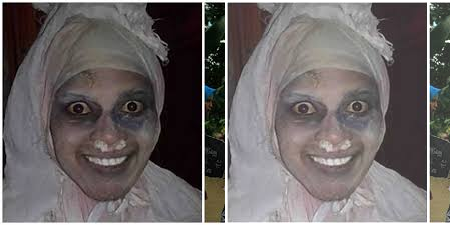

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

print('-----------------------------------')
print('      Mengubah tingkat kecerahan')
print('-----------------------------------')

# Input nilai kecerahan dari pengguna
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

# Path gambar
image_path = '/content/drive/MyDrive/PCVK_4K/pocong.jpeg'

# Baca gambar
original = cv2.imread(image_path)

# Cek apakah gambar berhasil dibaca
if original is None:
    print("Gambar tidak ditemukan atau tidak bisa dibaca.")
else:
    # Buat array kosong untuk gambar hasil perubahan brightness
    brightness_image = np.zeros(original.shape, original.dtype)

    # Akses per piksel dan ubah kecerahan
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

    # Cara lebih simple tanpa for loop (alternatif)
    # brightness_image = cv2.convertScaleAbs(original, beta=brightness)

    # Gabungkan gambar asli dan gambar dengan kecerahan baru
    final_frame = cv2.hconcat([original, brightness_image])

    # Tampilkan hasil menggunakan cv2_imshow di Colab
    cv2_imshow(final_frame)


Mengimplementasikan Inverse Citra
---------------------------------


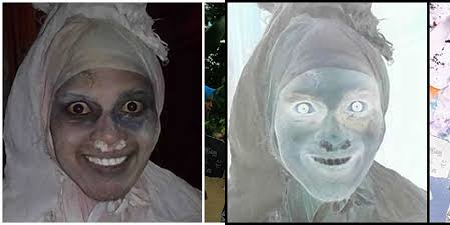

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print("Mengimplementasikan Inverse Citra")
print("---------------------------------")

# Baca gambar
image_path = cv2.imread("/content/drive/MyDrive/PCVK_4K/pocong.jpeg")

# Cek apakah gambar berhasil di-load
if image_path is None:
    print("Gambar tidak ditemukan. Periksa kembali path gambar.")
else:
    # Membuat citra negatif
    negative_image = np.zeros(image_path.shape, image_path.dtype)

    for y in range(image_path.shape[0]):
        for x in range(image_path.shape[1]):
            for c in range(image_path.shape[2]):
                negative_image[y, x, c] = 255 - image_path[y, x, c]

    # Gabungkan gambar asli dan gambar negatif secara horizontal
    final_frame = cv2.hconcat([image_path, negative_image])

    # Tampilkan gambar hasil
    cv2_imshow(final_frame)


Mengubah Kontras dan Tingkat Kecerahan Citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan tingkat kontras [1.0 - 3.0]: 2


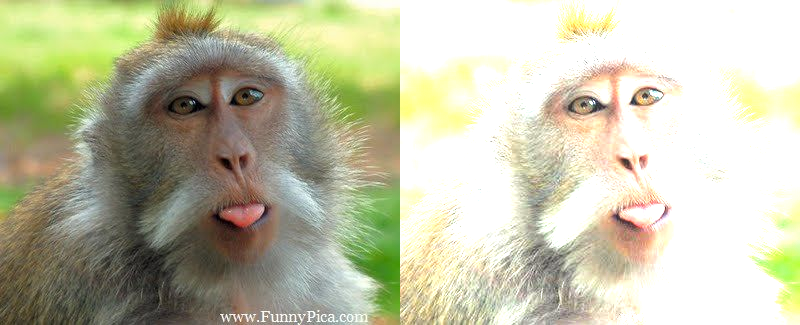

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print("Mengubah Kontras dan Tingkat Kecerahan Citra")
print("--------------------------------------------")

# Baca gambar
original = cv2.imread("/content/drive/MyDrive/PCVK_4K/monyet.jpg")

# Cek apakah gambar berhasil di-load
if original is None:
    print("Gambar tidak ditemukan. Periksa kembali path gambar.")
else:
    try:
        # Input dari pengguna
        brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
        contrast = float(input("Masukkan tingkat kontras [1.0 - 3.0]: "))
    except ValueError:
        print("Error, not a number!")

    # Transformasi citra dengan mengubah brightness dan contrast
    transform_image = np.zeros(original.shape, original.dtype)

    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                transform_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

    # Gabungkan gambar asli dan gambar hasil transformasi secara horizontal
    final_frame = cv2.hconcat((original, transform_image))

    # Tampilkan gambar
    cv2_imshow(final_frame)


Mengimplementasikan Transformasi Logaritmik
-------------------------------------------
Masukkan nilai kecerahan (c): 50


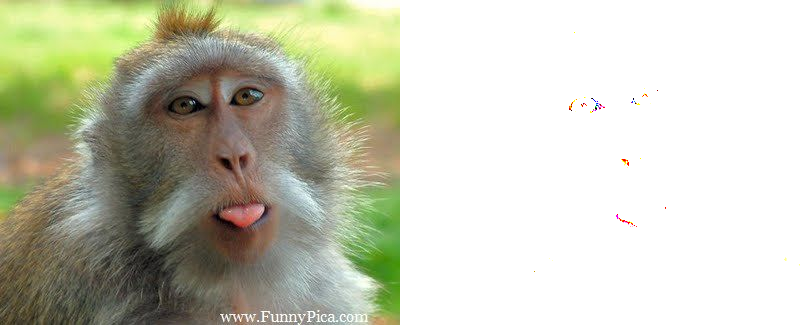

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print("Mengimplementasikan Transformasi Logaritmik")
print("-------------------------------------------")

original = cv2.imread("/content/drive/MyDrive/PCVK_4K/monyet.jpg")

if original is None:
    print("Gambar tidak ditemukan. Periksa kembali path gambar.")
else:
    try:
        brightness = float(input('Masukkan nilai kecerahan (c): '))
    except ValueError:
        print('Error, input harus berupa angka')
    normalized_image = original / 255.0
    c = brightness
    log_image = c * np.log1p(normalized_image)
    log_image = np.uint8(np.clip(log_image * 255, 0, 255))

    final_frame = cv2.hconcat((original, log_image))
    cv2_imshow(final_frame)


Mengimplementasikan Transformasi Grayscale
-------------------------------------------


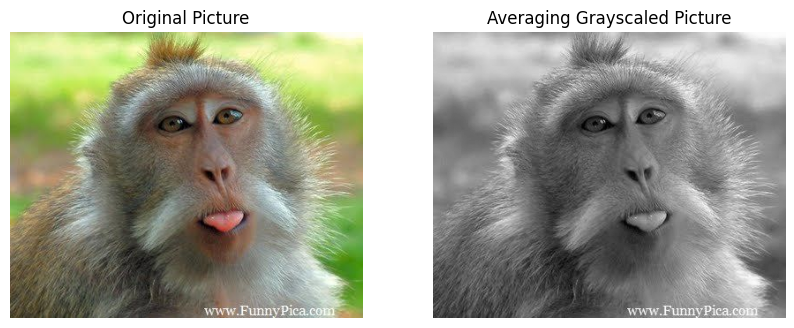

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("Mengimplementasikan Transformasi Grayscale")
print("-------------------------------------------")

image_path = cv2.imread("/content/drive/MyDrive/PCVK_4K/monyet.jpg")


if image_path is None:
    print("Gambar tidak ditemukan. Periksa kembali path gambar.")
else:
    grayscale_image = np.zeros((image_path.shape[0], image_path.shape[1]), dtype=np.uint8)

    for y in range(image_path.shape[0]):
        for x in range(image_path.shape[1]):
            grayscale_image[y, x] = np.mean(image_path[y, x])

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(cv2.cvtColor(image_path, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Picture')
    axes[0].axis('off')

    axes[1].imshow(grayscale_image, cmap='gray')
    axes[1].set_title('Averaging Grayscaled Picture')
    axes[1].axis('off')
    plt.show()


<ipython-input-14-f80eab1607ca>:25: RuntimeWarning: overflow encountered in scalar add
  grayscale_image[y, x] = (max_rgb + min_rgb) // 2


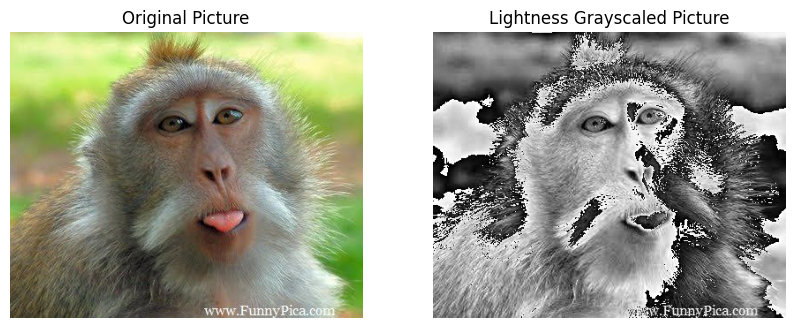

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

baboon = cv2.imread('/content/drive/MyDrive/PCVK_4K/monyet.jpg')


if baboon is None:
    print("Gambar tidak ditemukan. Periksa kembali path gambar.")
else:
    grayscale_image = np.zeros((baboon.shape[0], baboon.shape[1]), dtype=np.uint8)

    for y in range(baboon.shape[0]):
        for x in range(baboon.shape[1]):
            R = baboon[y, x, 2]
            G = baboon[y, x, 1]
            B = baboon[y, x, 0]

            max_rgb = max(R, G, B)
            min_rgb = min(R, G, B)
            grayscale_image[y, x] = (max_rgb + min_rgb) // 2

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Picture')
    axes[0].axis('off')

    axes[1].imshow(grayscale_image, cmap='gray')
    axes[1].set_title('Lightness Grayscaled Picture')
    axes[1].axis('off')

    plt.show()


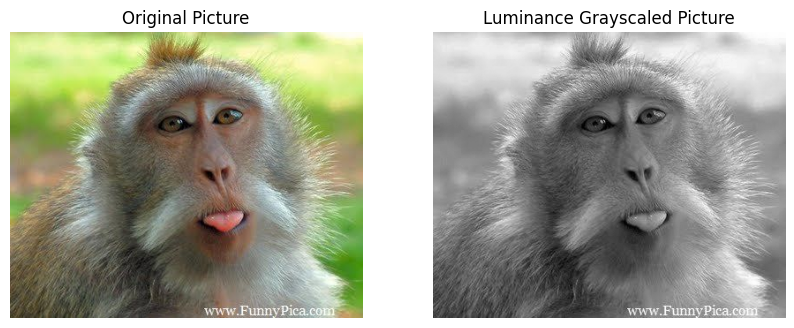

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

baboon = cv2.imread('/content/drive/MyDrive/PCVK_4K/monyet.jpg')

if baboon is None:
    print("Gambar tidak ditemukan. Periksa kembali path gambar.")
else:
    grayscale_image = np.zeros((baboon.shape[0], baboon.shape[1]), dtype=np.uint8)

    for y in range(baboon.shape[0]):
        for x in range(baboon.shape[1]):
            R = baboon[y, x, 2]
            G = baboon[y, x, 1]
            B = baboon[y, x, 0]

            grayscale_image[y, x] = int(0.299 * R + 0.587 * G + 0.114 * B)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Picture')
    axes[0].axis('off')

    axes[1].imshow(grayscale_image, cmap='gray')
    axes[1].set_title('Luminance Grayscaled Picture')
    axes[1].axis('off')

    plt.show()


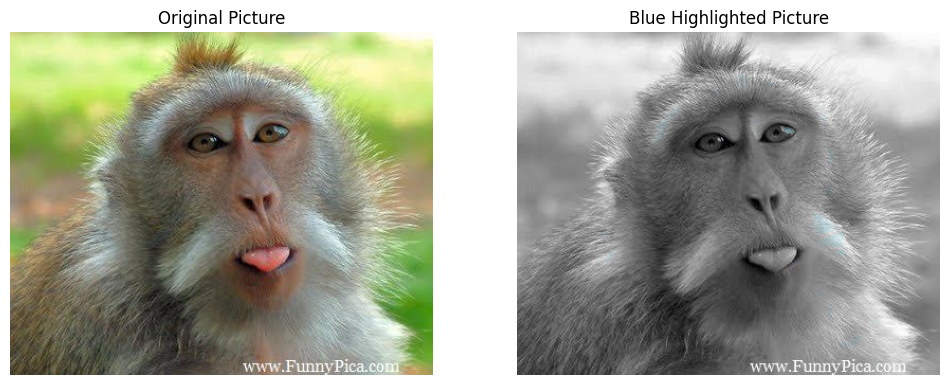

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

original = cv.imread('/content/drive/MyDrive/PCVK_4K/monyet.jpg')

if original is None:
    print("Gambar tidak ditemukan. Periksa kembali path gambar.")
else:
    original = cv.cvtColor(original, cv.COLOR_BGR2RGB)

    def blue_highlight(image):
        gray = (0.21 * image[:,:,0] + 0.72 * image[:,:,1] + 0.07 * image[:,:,2]).astype(np.uint8)

        blue_mask = (image[:,:,2] > 100) & (image[:,:,2] > image[:,:,1]) & (image[:,:,2] > image[:,:,0])

        result = np.dstack([gray, gray, gray])

        result[blue_mask] = image[blue_mask]

        return result

    blue_highlighted = blue_highlight(original)
    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(original), plt.title('Original Picture'), plt.axis('off')
    plt.subplot(122), plt.imshow(blue_highlighted), plt.title('Blue Highlighted Picture'), plt.axis('off')
    plt.show()
